In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.set_option('display.max_columns',None)
df=pd.read_csv(r'D:\Data Analytics\Python\Panda\Problem_Solving\ecommerce_clean.csv')

In [2]:
df.head(2)

,Unnamed: 0,index,order_id,order_date,delivered_date,customer_id,customer_name,customer_age,customer_gender,customer_segment,region,state,city,product_id,product_name,category,sub_category,brand,unit_price,quantity,discount_percentage,discount_amount,sales_amount,profit_margin,profit_amount,tax_rate,tax_amount,shipping_cost,shipping_method,total_amount,payment_method,delivery_time_days,order_status,rating,is_repeat_customer,order_year,order_month,order_quarter,order_day_of_week
0,0,0,ORD100722,2020-01-01,2020-01-04,CUST10257,Vikram Kumar,56,Female,Corporate,Central,Madhya Pradesh,Indore,PROD9221,Local Publishers Comics,Books,Comics,Local Publishers,495.34,1,10,49.53,445.80,0.448,199.71,0.12,53.50,56.65,Standard,555.95,Credit Card,3,Delivered,4.5,No,2020,1,Q1,Wednesday
1,1,1,ORD100766,2020-01-14,2020-01-15,CUST10171,Kavita Kumar,57,Male,Consumer,West,Gujarat,Vadodara,PROD6296,Oxford Self-Help,Books,Self-Help,Oxford,1313.37,4,0,0.00,5253.49,0.439,2306.35,0.12,630.42,125.12,Express,6009.03,Debit Card,1,Delivered,5.0,No,2020,1,Q1,Tuesday


### Find which brand–sub_category combinations have the highest profit_margin on average (only combinations with ≥ 5 orders). Show the top 8 in a bar chart titled "Most Profitable Brand–Sub-category Pairs".

In [58]:
brand_category=df.groupby(['brand','sub_category'])\
    .agg(
        avg_margin=('profit_margin','mean'),
        order_count=('order_id','count')
    ).reset_index()

brand_category=brand_category[brand_category.order_count>5]

top8=brand_category.nlargest(n=8,columns='avg_margin')

top8['label']=top8['brand']+" - "+top8['sub_category']

top8

,brand,sub_category,avg_margin,order_count,label
85,Local Publishers,Comics,0.422617,6,Local Publishers - Comics
118,Penguin,Non-Fiction,0.412400,9,Penguin - Non-Fiction
43,HarperCollins,Comics,0.401150,6,HarperCollins - Comics
47,HarperCollins,Self-Help,0.395057,7,HarperCollins - Self-Help
86,Local Publishers,Cooking,0.391820,10,Local Publishers - Cooking
110,Oxford,Cooking,0.390550,6,Oxford - Cooking
119,Penguin,Self-Help,0.385633,9,Penguin - Self-Help
44,HarperCollins,Cooking,0.385387,8,HarperCollins - Cooking


C:\Users\soura\AppData\Local\Temp\ipykernel_11804\3185200143.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


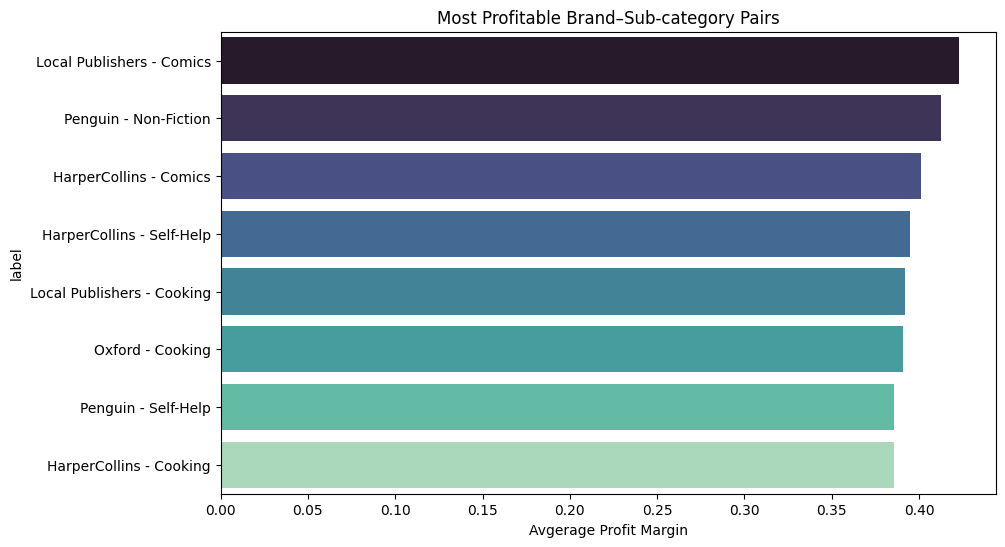

In [67]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=top8,
    y='label',
    x='avg_margin',
    palette='mako'
)

plt.xlabel('Avgerage Profit Margin')
plt.title('Most Profitable Brand–Sub-category Pairs')
plt.show()